In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

In [3]:
import numpy as np

In [29]:
num_points = 10000

In [30]:
from math import pi, sqrt

In [31]:
theta = np.linspace( 0, 2*pi, num_points, endpoint=False )

In [32]:
from numpy.random import normal

In [33]:
rho = [ 5 + normal() for _ in xrange(num_points) ]

In [34]:
annulus_X = rho * np.cos( theta )
annulus_Y = rho * np.sin( theta )

In [35]:
from scipy.spatial.distance import cdist

In [36]:
annulus_coords = np.vstack( (annulus_X, annulus_Y) ).T

In [37]:
annulus_coords.shape

(10000, 2)

In [38]:
annulus_coords

array([[  6.59006946e+00,   0.00000000e+00],
       [  6.79937213e+00,   4.27217207e-03],
       [  4.64554985e+00,   5.83777318e-03],
       ..., 
       [  5.80478451e+00,  -1.09417740e-02],
       [  6.78313980e+00,  -8.52394936e-03],
       [  4.83681155e+00,  -3.03905873e-03]])

In [39]:
annulus_dists = cdist( annulus_coords, np.array( [[0,0]]) )

In [40]:
annulus_dists[:5]

array([[ 6.59006946],
       [ 6.79937347],
       [ 4.64555352],
       [ 4.71788651],
       [ 5.8624804 ]])

In [41]:
annulus_dists.mean(), annulus_dists.std()

(4.9928667901275032, 1.0055513391046265)

In [42]:
np.array( (annulus_dists < 5 ), dtype=int ).sum()

4998

In [43]:
blob_coords = normal( 0, 5, (num_points, 2))

In [44]:
blob_coords.shape

(10000, 2)

In [45]:
blob_dists = cdist( blob_coords, np.array( [[0,0]]) )

In [46]:
blob_dists[:10]

array([[  6.76687752],
       [ 11.07362341],
       [  4.86803834],
       [  9.49552505],
       [ 10.39798397],
       [  2.34134647],
       [  8.47587782],
       [ 12.5780438 ],
       [  8.80194469],
       [  9.54592499]])

In [47]:
blob_dists.mean(), blob_dists.std()

(6.2414766780609741, 3.2951460545532969)

In [48]:
blob_dists.mean() / sqrt( pi) * sqrt(2)

4.9799778780360082

In [49]:
5 *  sqrt( pi) / sqrt(2)

6.2665706865775

In [50]:
np.array( (blob_dists < 5 ), dtype=int ).sum()

3968

In [51]:
np.array( (blob_dists < 10 ), dtype=int ).sum()

8655

In [52]:
np.array( (blob_dists < 15 ), dtype=int ).sum()

9888

In [53]:
from matplotlib.patches import Circle

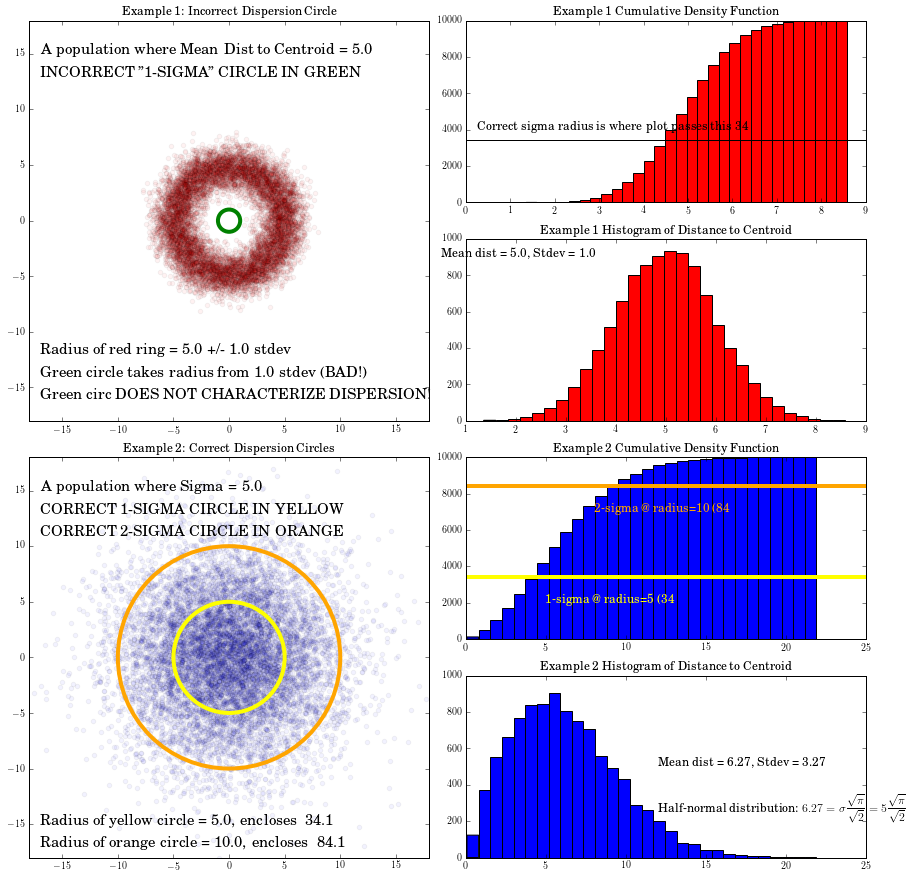

In [56]:
fig = plt.figure(figsize=(15,15))
#fig.suptitle( '')

ax = plt.subplot2grid((4,4), (0,0), colspan=2, rowspan=2)
ax.scatter( annulus_X, annulus_Y, c='red', alpha=0.05, edgecolors=None )
ax.set_ylim( (-18,18))
ax.set_xlim( (-18,18))
ax.set_title('Example 1: Incorrect Dispersion Circle')
ax.text(-17, 15, 'A population where Mean Dist to Centroid = 5.0', fontsize=15)
ax.text(-17, 13, 'INCORRECT "1-SIGMA" CIRCLE IN GREEN', fontsize=15)

ax.text(-17, -12, 'Radius of red ring = 5.0 +/- 1.0 stdev', fontsize=15)
ax.text(-17, -14, 'Green circle takes radius from 1.0 stdev (BAD!)', fontsize=15)
ax.text(-17, -16, 'Green circ DOES NOT CHARACTERIZE DISPERSION!', fontsize=15)
ax.add_patch( Circle( xy=(0,0), radius=(1), fc=None, ec='green', lw=4, fill=None ) )

ax = plt.subplot2grid((4,4), (2,0), colspan=2, rowspan=2 )
ax.scatter( blob_coords[:,0], blob_coords[:,1], alpha=0.05, edgecolors=None )
ax.set_ylim( (-18,18))
ax.set_xlim( (-18,18))
ax.set_title( 'Example 2: Correct Dispersion Circles')
ax.text(-17, 15, 'A population where Sigma = 5.0', fontsize=15)
ax.text(-17, 13, 'CORRECT 1-SIGMA CIRCLE IN YELLOW', fontsize=15)
ax.text(-17, 11, 'CORRECT 2-SIGMA CIRCLE IN ORANGE', fontsize=15)

ax.text(-17, -15, 'Radius of yellow circle = 5.0, encloses ~34.1%', fontsize=15)
ax.text(-17, -17, 'Radius of orange circle = 10.0, encloses ~84.1%', fontsize=15)
ax.add_patch( Circle( xy=(0,0), radius=(5), fc=None, ec='yellow', lw=4, fill=None ) )
ax.add_patch( Circle( xy=(0,0), radius=(10), fc=None, ec='orange', lw=4, fill=None ) )

ax = plt.subplot2grid((4,4), (0,2), colspan=2)
ax.hist( annulus_dists, 30, cumulative=True, facecolor='red' )
ax.plot( [3414]*10, c='black' )
#ax.plot( [8410]*10, c='black' )
#ax.plot( [9770]*10, c='black' )
ax.set_title('Example 1 Cumulative Density Function')
ax.text(0.25, 4000, 'Correct sigma radius is where plot passes this 34% line', fontsize=12, fontweight='bold')

ax = plt.subplot2grid((4,4), (1,2), colspan=2)
ax.hist( annulus_dists, 30, facecolor='red' )
#ax.set_xlim( (0,15))
ax.set_title('Example 1 Histogram of Distance to Centroid')
ax.text(0.5, 900, 'Mean dist = 5.0, Stdev = 1.0', fontsize=12 )

ax = plt.subplot2grid((4,4), (2,2), colspan=2)
ax.hist( blob_dists, 30, cumulative=True )
ax.plot( [3414]*26, c='yellow', lw=4 )
ax.plot( [8410]*26, c='orange', lw=4 )
#ax.plot( [9770]*26, c='black' )
ax.set_title('Example 2 Cumulative Density Function')
ax.text(5, 2000, '1-sigma @ radius=5 (34%)', color='yellow', fontsize=12, fontweight='bold')
ax.text(8, 7000, '2-sigma @ radius=10 (84%)', color='orange', fontsize=12, fontweight='bold')

ax = plt.subplot2grid((4,4), (3,2), colspan=2)
ax.hist( blob_dists, 30)
ax.text(12, 500, 'Mean dist = 6.27, Stdev = 3.27', fontsize=12)
ax.text(12, 200, r'Half-normal distribution: $\displaystyle6.27=\sigma\frac{\sqrt{\pi}}{\sqrt{2}}=5\frac{\sqrt{\pi}}{\sqrt{2}}$', fontsize=12)

ax.set_title('Example 2 Histogram of Distance to Centroid')

In [117]:
fig.savefig( 'sigma_circles_explanation.png' )

In [115]:
pwd

u'/Users/colettace/projects/dme_pca'